<a href="https://colab.research.google.com/github/MaximTislenko/GB_med_stat_R/blob/main/%D0%94%D0%BE%D0%BF_%D1%83%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дополнительные приемы управления данными
В главе 3 мы рассмотрели основные способы управления наборами данных в R. В этой главе мы сосредоточимся на более сложных подходах. Глава делится на три основные части. В первой части мы кратко познакомимся с многочисленными функциями, выполняющими математические и статистические вычисления, а также преобразование текстовых значений. Для придания этой части большей актуальности мы начнем с описания задачи по преобразованию данных, которую можно решить с использованием этих функций. После знакомства с функциями мы рассмотрим одно из возможных решений данной задачи.

Затем мы поговорим о том, как писать свои собственные функции для управления данными и их анализа. Сначала мы исследуем способы управления потоком выполнения инструкций с использованием циклов и условных операторов. Потом познакомимся со структурой пользовательских функций и узнаем, как их применять.

Наконец, мы рассмотрим способы агрегирования, обобщения и преобразования наборов данных. При агрегировании данных можно использовать любые встроенные или написанные пользователем функции, поэтому знания, полученные в первых двух разделах этой главы, вам действительно пригодятся.

In [103]:
library(tidyverse)
library(readxl)

## Задача по управлению данными
Прежде чем начинать обсуждение числовых и текстовых функций, определим задачу, которую затем будем решать. Группа студентов сдавала экзамены по математике, естественным наукам и английскому языку. Полученные ими баллы по трем предметам нужно объединить и получить единый показатель успеваемости для каждого студента. Кроме того, необходимо поставить оценку A первым по успеваемости 20 % студентов, оценку B – следующим по успеваемости 20 % и т. д. Наконец, список студентов нужно
отсортировать в алфавитном порядке.

\begin{array}{l|c|c|c}
Студент&Математика&Естественные~науки&Английский~язык\\\hline
John~Davis&502&95&25\\
Angela~Williams&600&99&22\\
Bullwinkie~Moose&412&80&18\\
David~Jones&358&82&15\\
Janice~Markhammer&495&75&20\\
Cheryl~Cushing&512&85&28\\
Reuven~Ytzrhak&410&80&15\\
Greg~Knox&625&95&30\\
Joel~England&573&89&27\\
Mary~Rayburn&522&86&18
\end{array}

При взгляде на эти данные сразу можно заметить несколько проблем. Во-первых, баллы, полученные на экзаменах по разным предметам, несопоставимы между собой. Их средние значения и стандартные отклонения сильно различаются, поэтому усреднять их не имеет смысла. Для вычисления единого показателя успеваемости необходимо преобразовать эти баллы так, чтобы их можно было сопоставлять между собой. Во-вторых, нам понадобится метод для определения мест студентов в общем рейтинге успеваемости, чтобы поставить им итоговую оценку. В-третьих, для нормальной сортировки студентов в алфавитном порядке нужно разбить первый столбец на два – с именем и фамилией.

Все перечисленные проблемы можно устранить с помощью числовых и текстовых функций в R. После знакомства с функциями в следующем разделе мы сможем найти подходящее решение для нашей задачи по управлению данными.


## Числовые и текстовые функции
В этом разделе перечисляются функции R, которые можно использовать для управления данными. Их можно разделить на числовые (математические, статистические, вероятностные) и текстовые. После знакомства с функциями обоих типов я покажу вам, как применять их к столбцам (переменным) и строкам (наблюдениям) таблиц данных

### Математические функции
\begin{array}{r|l}
Функция&Описание\\\hline
abs(x)&Абсолютное~значение\\
~&abs(-4)~вернет~4\\\hline
sqrt(x)&Квадратный~корень\\
~&sqrt(25)~вернет~5\\
~&То~же~самое, что~и~25**(0.5)\\\hline
ceiling(x)&Ближайшее~целое~число, не~меньшее, чем~x\\
~&ceiling(3.457)~вернет~4\\\hline
floor(x)&Ближайшее~целое~число, не~большее, чем~x\\
~&floor(3.457)~вернет~3\\\hline
trunk(x)&Целое~число, полученное~округлением~x~в~сторону~нуля\\
~&trunk(5.99)~вернет~5\\\hline
round(x,~ digits=n)&Округляет~x~до~заданного~числа~знаков~n~после~запятой\\
~&round(3.475,~digits=2)~вернет~3.48\\\hline
signif(x,~digits=n)&Округляет~x~до~заданного~числа~n~значащих~цифр\\
~&signif(3.475,~digits=2)~вернет~3.5\\\hline
cos(x), sin(x), tan(x)&Косинус, синус~и~тангенс\\
~&cos(2) вернет –0.416\\\hline
acos(x), asin(x),atan(x)&Арккосинус, арксинус~и~арктангенс\\
~&acos(-0.416)~вернет~2\\\hline
cosh(x), sinh(x), tanh(x)&Гиперболические~косинус, синус~и~тангенс\\
~&sinh(2)~вернет~3.627\\\hline
acosh(x), asinh(x), atanh(x)&Гиперболические~арккосинус, арксинус~и~арктангенс\\
~&asinh(3.627)~вернет~2\\\hline
log(x,~base=n)&Логарифм~x~по~основанию~n\\
log(x)&Для~удобства:\\
log10(x)&log(x) – натуральный~логарифм\\
~&log10(x) – десятичный логарифм\\
~&log(10)~вернет~2.3026\\
~&log10(10)~вернет~1\\\hline
exp(x)&Экспоненциальная~функция\\
~&exp(2.3026)~вернет~10\\\hline
\end{array}

В основном эти функции применяются для преобразования данных. К примеру, данные с положительно асимметричным распределением перед дальнейшей обработкой обычно логарифмируют. Математические функции также используют при реализации вычислений по формулам, создании графиков (например, кривая зависимости `x` от `sin(x)`) и форматировании числовых значений перед выводом на экран.

В таблице показаны примеры применения математических функций к скалярам (отдельным числам). Когда эти функции применяются к числовым векторам, матрицам или таблицам данных, они преобразуют каждое число отдельно. Например, `sqrt(c(4, 16, 25))` вернет вектор `c(2, 4, 5)`.

### Статистические функции

Самые распространенные статистические функции перечислены
в таблице ниже. Многие из них принимают дополнительные параметры, влияющие на результат. Например,
```
y <- mean(x)
```
вычислит среднее арифметическое по всем элементам объекта x, а
```
z <- mean(x, trim = 0.05, na.rm=TRUE)
```
вычислит усеченное среднее, исключив 5 % наибольших и 5 % наименьших значений в выборке, а также пропущенные значения. Используйте `help()`, чтобы узнать больше о каждой функции и ее аргументах.

\begin{array}{r|l}
Функция&Описание\\\hline
mean(x)&Среднее~арифметическое\\
~&mean(c(1,2,3,4))~вернет~2.5\\\hline
median(x)&Медиана\\
~&median(c(1,2,3,4))~вернет~2.5\\\hline
sd(x)&Стандартное~отклонение\\
~&sd(c(1,2,3,4))~вернет~1.29\\\hline
var(x)&Дисперсия\\
~&var(c(1,2,3,4))~вернет~1.67\\\hline
mad(x)&Абсолютное~отклонение~медианы\\
~&mad(c(1,2,3,4))~вернет~1.48\\\hline
quantile(x,~probs)&Квантили, где~x~–~числовой~вектор, для~которого~вычисляются~квантили,\\
~&а~probs~–~числовой~вектор~с~вероятностями~в~диапазоне~[0; 1]\\
~&\# 30^й~и~84^й~процентили~x\\
~&y <- quantile(x, c(.3,.84))\\\hline
range(x)&Размах~значений\\
~&x <- c(1,2,3,4)\\
~&range(x)~ вернет~ c(1,4).\\
~&diff(range(x))~ вернет~3\\\hline
sum(x)&Сумма\\
~&sum(c(1,2,3,4))~ вернет~ 10\\\hline
diff(x,~ lag=n)&Разности~между~значениями~в~выборке, взятыми~с~заданным~интервалом\\
~&lag.~По~умолчанию~интервал~равен~1.\\
~&x <- c(1,5,23,29)\\
~&diff(x)~вернет~c(4, 18, 6)\\\hline
min(x)&Минимум\\
~&min(c(1,2,3,4))~вернет~1\\\hline
max(x)&Максимум\\
~&max(c(1,2,3,4))~вернет~4\\\hline
scale(x,&Значения~объекта~x,~центрированные~(center=TRUE)~или~стандартизиро-\\
center=TRUE,&ванные~(center=TRUE,~scale=TRUE)~по~столбцам.~Пример~использования\\
scale=TRUE)&приводится~в~листинге~ниже.\\\hline
\end{array}



In [50]:
x <- c(1,2,3,4,5,6,7,8)

In [51]:
# Стеднее арифметическое
mean(x)

[1] 4.5

In [52]:
# Стандартное отклонение
sd(x)

[1] 2.4

In [53]:
# Долгий способ
n <- length(x)
meanx <- sum(x)/n
css <- sum((x - meanx)^2)
sdx <- sqrt(css / (n-1))
meanx
sdx

[1] 4.5

[1] 2.4

#### Стандартизация данных
По умолчанию функция `scale()` стандартизирует заданный столбец матрицы или таблицы данных так, чтобы его среднее арифметическое стало равно нулю, а стандартное отклонение – единице 1:
```
newdata <- scale(mydata)
```
Для стандартизации каждого столбца так, чтобы его среднее арифметическое и стандартное отклонение приобрели заданные значения, можно использовать примерно такой программный код:
```
newdata <- scale(mydata)*SD + M
```
где M – желаемое значение среднего арифметического, а SD – стандартного отклонения.

Применение функции `scale()` к столбцам с нечисловыми данными вызывает сообщение об ошибке. Чтобы стандартизировать определенный столбец, а не всю матрицу или таблицу данных целиком, можно использовать такой программный код:
```
newdata <- transform(mydata, myvar = scale(myvar)*10+50)
```
Этот код преобразует вектор myvar так, что его среднее арифметическое становится равным 50, а стандартное отклонение – 10. Мы будем использовать функцию scale() для решения описанной выше задачи


### Функции распределения вероятности
Вы можете задаться вопросом: почему функции распределения вероятности не были рассмотрены вместе со статистическими (это действительно странно, не правда ли?). Хотя функции распределения вероятности являются статистическими, они настолько своеобразны, что заслуживают отдельного обсуждения. Эти функции обычно используются для создания искусственных данных с известными параметрами и для вычисления вероятностей в пользовательских статистических функциях.
В программе R функции распределения вероятности имеют вид:
```
[dpqr]distribution_abbreviation()
```
где первая буква в имени обозначает параметр распределения данных:

d = плотность;

p = функция распределения;

q = функция, определяющая квантили;

r = генератор случайных отклонений.

Наиболее распространенные функции распределения вероятности перечислены в таблице ниже
\begin{array}{r|l|r|l}
Распределение&Краткое~название&Распределение&Краткое~название\\\hline
Бета&beta&Логистическое&logis\\\hline
Биноминальное&binom&Мультиноминальное&multinom\\\hline
Коши&cauchy&Отрицательное~биноминальное&nbinom\\\hline
Хи-квадрат~(ассиметричное)&chisq&Нормальное&nirm\\\hline
Экспонециальное&exp&Пуассоновское&pois\\\hline
F&f&Знаковых~рангов~Вилкоксона&signrank\\\hline
Гамма&gamma&Т&t\\\hline
Геометрическое&geom&Равномерное&unif\\\hline
Гипергеометрическое&hyper&Вейбулла&weibull\\\hline
Логнормальное&lnom&Суммы~рангов~Вилкоксона&wilcox\\\hline
\end{array}

Чтобы понять, как они работают, рассмотрим функцию нормального распределения. Если значения среднего арифметического и стандартного отклонения не указаны явно, то по умолчанию будет воспроизводиться стандартное нормальное распределение (среднее арифметическое равно 0, стандартное отклонение равно 1). Примеры функций плотности (`dnorm`), распределения (`pnorm`), квантилей (`qnorm`) и генератора случайных отклонений (`rnorm`) приведены ниже.



#### Как нарисовать кривую стандартного нормального распределения в диапазоне значений [–3, 3]

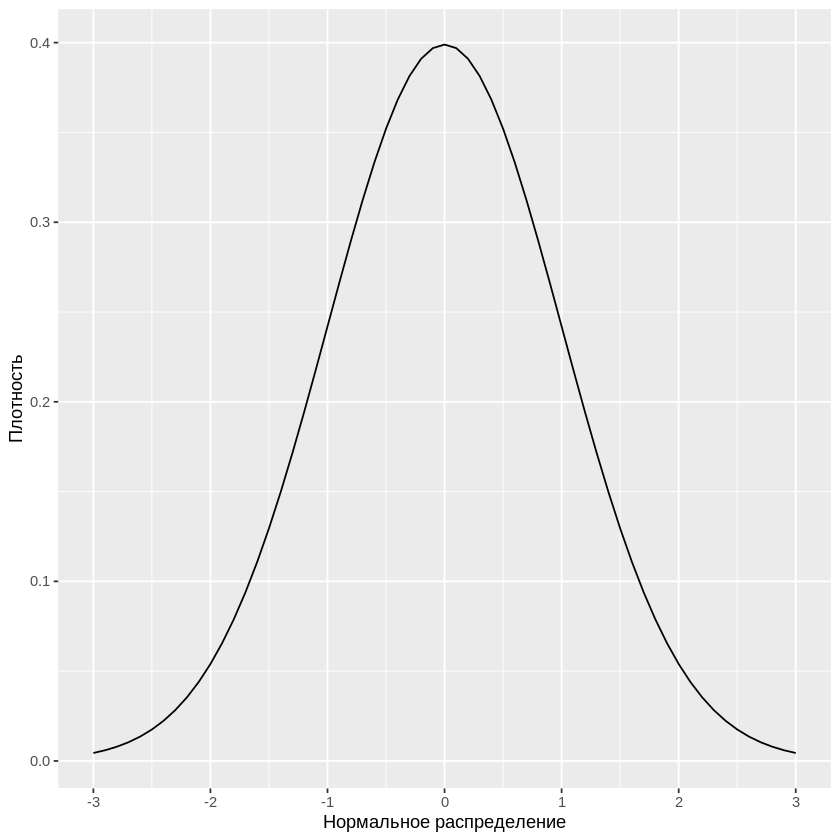

In [54]:
x <- seq(from = -3, to = 3, by = 0.1)
y <- dnorm(x)
data <- data.frame(x = x, y = y)
ggplot(data, aes(x, y))+
  geom_line() +
  labs(x = "Нормальное распределение", y = "Плотность") +
  scale_x_continuous(breaks = seq(-3, 3, 1))

#### Как определить площадь под кривой стандартного нормального распределения слева от z=1.96?

In [55]:
pnorm(1.96)

[1] 0.98

#### Как определить значение 90-го процентиля нормального распределения со средним значением 500 и стандартным отклонением 100?

In [56]:
qnorm(.9, mean=500, sd=100)

[1] 628

#### Как создать 50 случайных чисел, принадлежащих нормальному распределению со средним значением 50 и стандартным отклонением 10?

In [57]:
rnorm(50, mean=50, sd=10)

[1] 60 38 57 49 68 48 35 55 54 50 39 42 50 60 46 41 23 55 54 63 65 49 63 50 43
[26] 42 47 52 50 52 52 57 47 66 54 38 47 55 46 53 54 63 43 50 44 39 32 52 56 56

#### Выбор начального значения для генератора случайных чисел
Каждый раз, когда генерируется новая последовательность псевдослучайных чисел, используется новое начальное число, чтобы на выходе получались разные результаты. Однако, чтобы сделать результаты воспроизводимыми, можно это начальное число задать явно при помощи функции `set.seed()`, как показано ниже. Здесь используется функция `runif()`, генерирующая псевдослучайные числа, принадлежащие однородному распределению в интервале от 0 до 1.

In [58]:
runif(5)

[1] 0.082 0.424 0.129 0.031 0.127

In [59]:
runif(5)

[1] 0.36 0.25 0.52 0.57 0.45

In [60]:
set.seed(1234)
runif(5)

[1] 0.11 0.62 0.61 0.62 0.86

In [61]:
set.seed(1234)
runif(5)

[1] 0.11 0.62 0.61 0.62 0.86

#### Генерирование многомерных данных с нормальным распределением

В исследованиях с использованием искусственных данных и методов Монте-Карло часто бывает необходимо генерировать многомерные данные с нормальным распределением, соответствующие заданным вектору средних значений и ковариационной матрице. Функция `draw.d.variate.normal()` из пакета MultiRNG позволяет легко справиться с этой задачей. Эта функция имеет следующий синтаксис:
```
draw.d.variate.normal(n, nvar, mean, sigma)
```
где `n` – требуемый объем выборки, `nvar` – количество переменных, `mean` – вектор средних значений, а `sigma` – ковариационная (или корреляционная) матрица. Код ниже создаст выборку из 500 наблюдений с многомерным нормальным распределением трех переменных со следующими параметрами:
\begin{array}{l|r|r|r}
\hline
Вектор~средних~значений&230.7&146.7&3.6\\\hline
Ковариационная~матрица&15360.8&6721.2&-47.1\\
~&6721.2&4700.9&-16.5\\
~&-47.1&-16.5&0.3\\\hline
\end{array}


In [62]:
install.packages("MultiRNG")
library(MultiRNG)
options(digits=3)
# Задается случайное начальное число
set.seed(1234)
# Задаются вектор средних значений и ковариационная матрица
mean <- c(230.7, 146.7, 3.6)
sigma <- matrix(c(15360.8, 6721.2, -47.1, 6721.2, 4700.9, -16.5, -47.1, -16.5, 0.3), nrow=3, ncol=3)
# Генерирование данных
mydata <- draw.d.variate.normal(500, 3, mean, sigma)
mydata <- as.data.frame(mydata)
names(mydata) <- c("y","x1","x2")
# Вывод результатов
dim(mydata)
head(mydata, n=10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 500   3

,y,x1,x2
,<dbl>,<dbl>,<dbl>
1,81.1,122.6,3.69
2,265.1,110.4,3.49
3,365.1,235.3,2.67
4,-60.0,14.9,4.72
5,283.9,244.8,3.88
6,293.4,163.9,2.66
7,159.5,51.5,4.03
8,163.0,137.7,3.77
9,160.7,131.0,3.59


In [63]:
sigma

15360.8,6721.2,-47.1
6721.2,4700.9,-16.5
-47.1,-16.5,0.3


Код в листинге 5.3 задает начальное число для генератора случайных чисел, чтобы потом можно было воспроизвести полученный результат. Определяет вектор средних значений и ковариационную матрицу и генерирует 500 псевдослучайных чисел. Для удобства результаты преобразованы из матрицы в таблицу данных,а переменным присвоены имена. В заключение код проверяет, действительно ли было сгенерировано 500 наблюдений по трем переменным, и выводит первые 10 наблюдений. Учтите, что поскольку корреляционная матрица также является ковариационной матрицей, вы можете напрямую задать структуру взаимосвязей (корреляций).

Пакет `MultiRNG` позволяет генерировать случайные данные из 10 многомерных распределений, включая многомерные версии распределений T, равномерного, Бернулли, гипергеометрического, мультиномиального, Лапласа, Уишарта. С помощью функций распределения вероятности можно генерировать синтетические (искусственные) данные, подчиняющиеся распределениям с известными параметрами. Число статистических методов, которые используют искусственные данные, в настоящее время лавинообразно растет, и вы увидите несколько примеров их применения в следующих главах.

### Текстовые функции
В то время как математические и статистические функции оперируют числовыми данными, текстовые функции извлекают информацию из текстовых данных или изменяют формат текстовых данных для вывода на экран и составления отчетов. Например, вам может понадобиться объединить имя и фамилию человека в одной ячейке таблицы и гарантировать, что они начинаются с прописных букв. Некоторые из наиболее часто используемых текстовых функций перечислены в таблице ниже.

\begin{array}{l|l}
\hline
nchar(x)&Подсчитывает~число~элементов~в~x.\\
~&x <- c("ab", "cde", "fghij")\\
~&nchar(x[3]) вернет 5\\\hline
substr(x, start, stop)&Извлекает~или~замещает~часть~текстового~вектора.\\
~&x <- "abcdef"\\
~&substr(x, 2, 4)~вернет~"bcd".\\
~&substr(x, 2, 4) <- "22222"\\
~&(x~теперь~содержит~текст~"a222ef")\\\hline
grep(pattern, x,&Ищет~совпадения~с~шаблоном~pattern~в~x.~ Если~fixed=FALSE,~то\\
ignore.case=FALSE, fixed=FALSE)&pattern~интерпретируется~ как~регулярное~выражение.~Если\\
~&fixed=TRUE,~то~pattern~интерпретируется~как~простая~текст-\\
~&овая~строка.~Возвращает~индексы~найденных совпадений.\\
~&grep("A",~c("b","A","c"),~fixed=TRUE)~вернет~2\\\hline
sub(pattern, replacement, x,&Ищет~совпадения~с~шаблоном~pattern~в~x~и~замещает~най-\\
ignore.case=FALSE, fixed=FALSE)&
денное~совпадение~текстом~replacement.~Если~fixed=FALSE,~то\\
~&pattern~интерпретируется~как~регулярное выражение.~Если\\
~&fixed=TRUE,~то~pattern~интерпретируется~как~простая~тексто-\\
~&вая~строка.\\
~&sub("\~\s",".","Hello There")~вернет~Hello.There.~Обратите\\
~&внимание,~что "\s"~–~это~регулярное~выражение,~совпада-\\
~&ющее~с~пробелами;~здесь~используется~"\~\s",~потому~что\\
~&обратный~слеш~"\"~в~R~–~это~экранирующий~символ\\\hline
strsplit(x, split, fixed=FALSE)&Разбивает~текстовый~вектор~x~на~элементы~по~значению~split.\\
~&Если~fixed=FALSE,~то~split~интерпретируется~как~регулярное\\
~&выражение.~Если~fixed=TRUE,~то~split~интерпретируется~как\\
~&простая~текстовая~строка.\\
~&y~<-~strsplit("abc", "")~вернет~один~компонент~–~список\\
~&c~тремя~элементами:~"a"~"b"~"c".\\
~&unlist(y)[2]~и~sapply(y,~"[", 2)~вернут~"b"\\\hline
paste(..., sep="")&Объединяет~строки,~разделяя~их~заданной~строкой~sep.\\
~&paste("x",~1:3,~sep="")~вернет~c("x1",~"x2",~"x3").\\
~&paste("x",~1:3,~sep="M")~вернет~c("xM1",~"xM2",~"xM3").\\
~&paste("Today~is",~date())~вернет~Today~is~Thu~Jul~22~10:36:14~2021\\\hline
toupper(x)&Преобразует~строку~x~в~верхний~регистр.\\
~&toupper("abc")~вернет~"ABC"\\\hline
tolower(x)&Преобразует~строку~x~в~нижний~регистр.\\
~&tolower("ABC")~вернет~"abc"\\\hline
\end{array}

Обратите внимание, что функции `grep()`, `sub()` и `strsplit()` способны осуществлять поиск текстовых строк `(fixed=TRUE)` или регулярных выражений (`fixed=FALSE, по умолчанию`). Регулярные выражения имеют простой и последовательный синтаксис описания искомой комбинации символов. Например, регулярное выражение
```
^[hc]?at
```
соответствует всем строкам, которые начинаются с 0 или с одной буквы h или c, за которой следует at. Таким образом, это выражение позволит отыскать такие слова, как hat, cat и at, но не bat. Чтобы узнать больше, поищите в Википедии статьи по теме «регулярные выражения». Также можно порекомендовать статью «Regular Expression Tutorial» (https://ryanstutorials.net/regularexpressions-tutorial/) и интерактивное руководство «RegexOne» (https://regexone.com/).



### Другие полезные функции
Функции, перечисленные в таблице ниже, тоже могут пригодиться для управления данными и их преобразования, однако их нельзя уверенно отнести ни к одной из названных выше категорий.
\begin{array}{l|l}
\hline
Функция&Описание\\\hline
length(x)&Число~элементов~в~объекте~x.\\
~&x~<-~c(2,~5,~6,~9)\\
~&length(x)~вернет~4\\\hline
seq(from,~to,~by)&Создает~последовательность~элементов.\\
~&indices~<-~seq(1,~10,~2)\\
~&в~indices~будет~помещен~вектор~c(1,~3,~5,~7,~9)\\\hline
rep(x,~n)&Повторяет~x~n~раз.\\
~&y~<-~rep(1:3,~2)\\
~&в~y~будет~помещен~вектор~c(1,~2,~3,~1,~2,~3)\\\hline
cut(x,~n)&Преобразует~непрерывную~переменную~x~в~фактор~с~n~уровнями.~Для~создания\\
~&упорядоченного~фактора~можно~добавить~параметр~ordered\_result~=~TRUE\\\hline
cat(...~,~file~=~&Объединяет~и~выводит~объекты~в~...~на~экран~или~в~файл~(если~указано~его~имя).\\
"myfile",~&name~<-~c("Jane")\\
append~=~FALSE)&cat("Hello"~,~name,~"\n")\\\hline
\end{array}

Последний пример в таблице показывает, как используется символ экранирования при выводе результатов на экран: \n добавляет перевод строки, \t – символ табуляции, \b – забой (возврат к предыдущему символу) и т. д. (введите `?Quotes` для получения дополнительной информации). Например, следующий код:

In [64]:
name <- "Максим"
cat( "Привет,", name, "\b.\n", "Разве это не", "\t", "ЗДОРОВО?\n")

Привет, Максим .
 Разве это не 	 ЗДОРОВО?


Обратите внимание, что вторая строка смещена на один символ вправо. Когда функция `cat()` объединяет объекты для вывода, она разделяет их пробелами. Вот почему был добавлен символ забоя (\b) перед точкой. Иначе получилось бы "Hello Bob".

Способы применения изученных на данный момент функций к числам, строкам и векторам интуитивно понятны и просты, но как применять их к матрицам и таблицам данных? Это и станет темой следующего раздела.

### Применение функций к матрицам и таблицам данных
Одно из интересных свойств функций R – возможность применять их к объектам разных типов (скалярам, векторам, матрицам, массивам и таблицам данных). Смотри следующий код.

In [65]:
a <- 5
sqrt(a)


[1] 2.24

In [66]:
b <- c(1.243, 5.654, 2.99)
round(b)

[1] 1 6 3

In [67]:
c <- matrix(runif(12), nrow=3)
c

0.9636,0.216,0.289,0.913
0.2068,0.240,0.804,0.353
0.0862,0.197,0.378,0.931


In [68]:
log(c)

-0.0371,-1.53,-1.241,-0.0912
-1.5762,-1.43,-0.218,-1.0402
-2.4511,-1.62,-0.972,-0.0710


Обратите внимание, что в примерах выше среднее значение для матрицы c равно скаляру (0.444). Функция `mean()` вычисляет среднее арифметическое для всех 12 элементов матрицы. А что, если понадобится вычислить средние значения для каждой из трех строк или каждого из четырех столбцов?

В R есть функция `apply()`, которая позволяет применить любую функцию к любой части матрицы, массива или таблицы данных. Она имеет следующий синтаксис:
```
apply(x, MARGIN, FUN, ...)
```
где x – это объект, MARGIN – индекс измерения, к которому применяется функция (столбцы или строки), FUN – функция и ... – другие параметры. Для матрицы или таблицы данных MARGIN=1 обозначает строки, а MARGIN=2 – столбцы. Взгляните на примеры:

In [69]:
# Генерирует данные
mydata <- matrix(rnorm(30), nrow=6)
mydata
# Вычисляются средние значения по строкам
apply(mydata, 1, mean)
# Вычисляются средние значения по столбцам
apply(mydata, 2, mean)
# Вычисляются усеченные средние значения по столбцам
apply(mydata, 2, mean, trim=0.2)

0.459,1.203,1.234,0.591,-0.281
-1.261,0.769,-1.891,-0.435,0.812
-0.527,0.238,-0.223,-0.251,-0.208
-0.557,-1.415,0.768,-0.926,1.451
-0.374,2.934,0.388,1.087,0.841
-0.604,0.935,0.609,-1.944,-0.866


[1]  0.641 -0.401 -0.194 -0.136  0.975 -0.374

[1] -0.478  0.777  0.148 -0.313  0.292

[1] -0.516  0.786  0.386 -0.255  0.291

Здесь сначала генерируется матрица 6×5, содержащая случайные числа, подчиняющиеся нормальному распределению ❶.

Затем вычисляются средние значения для каждой из шести строк ❷
и каждого из пяти столбцов ❸.

Наконец, вычисляются усеченные средние значения для каждого столбца (в данном случае усреднены «центральные» 60 % данных, без учета 20 % наибольших и 20 %
наименьших значений)❹.

Поскольку в параметре FUN можно передать любую функцию, в том числе и написанную вами, функция `apply()` действительно оказывается мощным средством. Функция `apply()` применяется к строкам или столбцам массива данных, а ее аналоги, `lapply()` и `sapply()`, применяют заданную функцию к целому списку. Вы увидите пример применения функции `sapply()` (более удобной версии функции lapply()) в следующем разделе. Теперь у вас есть все необходимые инструменты для управления
данными, представленными в разделе выше, так что давайте попро-
буем сделать это.

### Решение задачи по управлению данными
В задаче из раздела выше требовалось объединить результаты экзаменов по каждому предмету в единый балл успеваемости для каждого студента, каждому поставить оценку от A до F в зависимости от позиции в общем рейтинге (верхние 20 %, следующие 20 % и т. д.), отсортировать строки в списке по фамилии студентов, а затем и по имени. Решение этой задачи представлено ниже.

In [70]:
# options(digits=2) # Cокращает число знаков после запятой до двух у всех выводимых на экран чисел, это упрощает их восприятие
# Формирование таблицы
Student <- c("John Davis", "Angela Williams", "Bullwinkle Moose", "David Jones", "Janice Markhammer",
 "Cheryl Cushing", "Reuven Ytzrhak", "Greg Knox", "Joel England", "Mary Rayburn")
 Math <- c(502, 600, 412, 358, 495, 512, 410, 625, 573, 522)
 Science <- c(95, 99, 80, 82, 75, 85, 80, 95, 89, 86)
 English <- c(25, 22, 18, 15, 20, 28, 15, 30, 27, 18)
 roster <- data.frame(Student, Math, Science, English, stringsAsFactors=FALSE)
 roster

Student,Math,Science,English
<chr>,<dbl>,<dbl>,<dbl>
John Davis,502,95,25
Angela Williams,600,99,22
Bullwinkle Moose,412,80,18
David Jones,358,82,15
Janice Markhammer,495,75,20
Cheryl Cushing,512,85,28
Reuven Ytzrhak,410,80,15
Greg Knox,625,95,30
Joel England,573,89,27


Поскольку оценки по математике, естественным наукам и английскому
языку выставлены по разным шкалам (их средние и стандартные отклонения заметно различаются), их необходимо сделать сопоставимыми перед объединением. Один из подходов – стандартизировать переменные так, чтобы каждая оценка выражалась в стандартных отклонениях, а не в абсолютных баллах. Это можно сделать при помощи функции `scale()`:

In [71]:
z <- scale(roster[,2:4])
z

Math,Science,English
0.0127,1.078,0.5869
1.1434,1.591,0.0367
-1.0257,-0.847,-0.6969
-1.6487,-0.590,-1.2471
-0.0681,-1.489,-0.3301
0.1281,-0.205,1.1370
-1.0488,-0.847,-1.2471
1.4318,1.078,1.5038
0.8319,0.308,0.9536
0.2434,-0.077,-0.6969


Рассчитать показатель успеваемости студентов можно, усреднив значения стандартизированных баллов для каждой строки с помощью функции `mean()` и добавив их в список при помощи функции `cbind()`:

In [72]:
score <- apply(z, 1, mean)
roster <- cbind(roster, score)
roster

Student,Math,Science,English,score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
John Davis,502,95,25,0.559
Angela Williams,600,99,22,0.924
Bullwinkle Moose,412,80,18,-0.857
David Jones,358,82,15,-1.162
Janice Markhammer,495,75,20,-0.629
Cheryl Cushing,512,85,28,0.353
Reuven Ytzrhak,410,80,15,-1.048
Greg Knox,625,95,30,1.338
Joel England,573,89,27,0.698


Функция `quantile()` позволяет вычислить границы 20%-ных интервалов (процентилей) показателя успеваемости. Как видите, нижняя граница для оценки A равна 0.74, для оценки B – 0.44 и т. д.:

In [73]:
# options(digits=2)
y <- quantile(roster$score, c(.8,.6,.4,.2))
y

80%    60%    40%    20% 
 0.743  0.436 -0.358 -0.895

Используя логические операторы, можно перекодировать значения показателя успеваемости в новую категориальную переменную итоговой оценки. Для этого в таблице данных roster создается переменная grade:

In [74]:
roster$grade <- NA
roster$grade[score >= y[1]] <- "A"
roster$grade[score < y[1] & score >= y[2]] <- "B"
roster$grade[score < y[2] & score >= y[3]] <- "C"
roster$grade[score < y[3] & score >= y[4]] <- "D"
roster$grade[score < y[4]] <- "F"
roster

Student,Math,Science,English,score,grade
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
John Davis,502,95,25,0.559,B
Angela Williams,600,99,22,0.924,A
Bullwinkle Moose,412,80,18,-0.857,D
David Jones,358,82,15,-1.162,F
Janice Markhammer,495,75,20,-0.629,D
Cheryl Cushing,512,85,28,0.353,C
Reuven Ytzrhak,410,80,15,-1.048,F
Greg Knox,625,95,30,1.338,A
Joel England,573,89,27,0.698,B


Отделить друг от друга имена и фамилии студентов, разделенные пробелом, можно с помощью функции `strsplit()`. Применение этой функции к вектору из строк приводит к созданию списка:

In [75]:
name <- strsplit((roster$Student), " ")
name

[[1]]
[1] "John"  "Davis"

[[2]]
[1] "Angela"   "Williams"

[[3]]
[1] "Bullwinkle" "Moose"     

[[4]]
[1] "David" "Jones"

[[5]]
[1] "Janice"     "Markhammer"

[[6]]
[1] "Cheryl"  "Cushing"

[[7]]
[1] "Reuven"  "Ytzrhak"

[[8]]
[1] "Greg" "Knox"

[[9]]
[1] "Joel"    "England"

[[10]]
[1] "Mary"    "Rayburn"

Применение функции `sapply()`, чтобы поместить первый элемент каждого компонента в вектор с именами Firstname, а второй – в вектор с фамилиями Lastname. "[" – это функция, извлекающая часть объекта – в данном случае первый или второй элемент списка name. Добавить эти элементы в набор данных roster можно с помощью функции `cbind()`. Поскольку переменная student с именем и фамилией каждого студента больше не нужна, от нее можно избавиться (указав индекс -1 в обращении к таблице данных roster):

In [76]:
Firstname <- sapply(name, "[", 1) # Первый элемент из строки
Lastname <- sapply(name, "[", 2) # Второй элемент из строки
roster <- cbind(Firstname, Lastname, roster[,-1]) # Удаление столбца Student
roster

Firstname,Lastname,Math,Science,English,score,grade
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
John,Davis,502,95,25,0.559,B
Angela,Williams,600,99,22,0.924,A
Bullwinkle,Moose,412,80,18,-0.857,D
David,Jones,358,82,15,-1.162,F
Janice,Markhammer,495,75,20,-0.629,D
Cheryl,Cushing,512,85,28,0.353,C
Reuven,Ytzrhak,410,80,15,-1.048,F
Greg,Knox,625,95,30,1.338,A
Joel,England,573,89,27,0.698,B


Наконец, можно отсортировать список по именам и фамилиям студентов при помощи функции `order()`:

In [77]:
roster[order(Firstname, Lastname),]

,Firstname,Lastname,Math,Science,English,score,grade
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,Angela,Williams,600,99,22,0.924,A
3,Bullwinkle,Moose,412,80,18,-0.857,D
6,Cheryl,Cushing,512,85,28,0.353,C
4,David,Jones,358,82,15,-1.162,F
8,Greg,Knox,625,95,30,1.338,A
5,Janice,Markhammer,495,75,20,-0.629,D
9,Joel,England,573,89,27,0.698,B
1,John,Davis,502,95,25,0.559,B
10,Mary,Rayburn,522,86,18,-0.177,C


Вот и все! Пара пустяков!

Существует много других способов решить эту же задачу, но приведенный пример позволяет понять идею применения этих функций. Теперь настала пора обратиться к условным операторам и функциям, которые пишутся самими пользователями.

## Управление потоком выполнения
Обычно инструкции в R выполняются последовательно, от начала программы до конца. Однако иногда некоторые инструкции нужно выполнить несколько раз, а другие – только при определенных условиях. В таких ситуациях следует использовать специальные конструкции управления потоком выполнения.

В R реализованы многие стандартные конструкции такого типа, которые можно встретить в любом другом современном языке программирования. Сначала мы рассмотрим условные конструкции, а затем – конструкции, используемые для циклического выполнения.

Во всех примерах этого раздела будут использоваться следующие сокращения:
* statement – простая или составная инструкция (группа инструкций, заключенных в фигурные скобки {} и разделенных точкой с запятой);
* cond – условное выражение, которое может возвращать TRUE или FALSE;
* expr – выражение, возвращающее число или текстовую строку;
* seq – последовательность чисел или текстовых строк.

После обсуждения конструкций управления потоком выполнения мы перейдем к созданию своих собственных функций.

### Циклы
Конструкции циклов многократно выполняют одну и ту же инструкцию или их набор, пока не выполнится заданное условие. К таким конструкциям относятся циклы `for` и `while`.
#### `for`
Конструкция цикла `for` выполняет инструкцию statement для каждого значения в последовательности seq. Она имеет следующий синтаксис:
```
for (var in seq) statement
```
Следующий код:
```
for (i in 1:10) print("Hello")
```
выведет слово Hello 10 раз.

#### `while`
Конструкция цикла while повторно выполняет инструкцию, пока заданное условие остается истинным. Она имеет следующий синтаксис:
```
while (cond) statement
```
Следующий код:
```
i <- 10
while (i > 0) {print("Hello"); i <- i - 1}
```
тоже выведет слово Hello 10 раз. Убедитесь, что инструкции внутри фигурных скобок изменяют переменную, проверяемую в условном выражении cond так, что рано или поздно оно перестанет быть истинным, иначе цикл никогда не завершится! В предыдущем примере инструкция
```
i <- i – 1
```
вычитает 1 из объекта i в каждом цикле, поэтому после десятого цикла значение i не будет больше 0. Если после каждого цикла, наоборот, прибавлять по единице, то программа никогда не перестала бы выводить Hello. Вот почему `while` может быть опаснее других циклических конструкций.

Циклы в R могут быть неэффективными и занимать много времени, особенно при обработке больших объемов данных. При любой возможности лучше вместо циклов использовать встроенные числовые и текстовые функции в сочетании с функциями из семейства apply.

### Выполнение по условию
Выполнение по условию означает, что инструкции выполняются,
только если соблюдается определенное условие. К таким конструк-
циям относятся `if-else`, `ifelse` и `switch`.
#### `if-else`
Условный оператор `if-else` выполняет инструкцию, если заданное условие верно. Также есть возможность выполнить другую инструкцию, если условие не верно. Он имеет следующий синтаксис:
```
if (cond) statement
if (cond) statement1 else statement2
```
Например:
```
if (is.character(grade)) grade <- as.factor(grade)
if (!is.factor(grade)) grade <- as.factor(grade) else print("Grade already is a factor")
```
В первом случае, если переменная grade – текстовый вектор, она преобразуется в фактор. Во втором случае выполняется одна из двух инструкций. Если переменная grade – не фактор (обратите внимание на символ !), то она преобразуется в него. Если эта переменная – уже фактор, то выводится сообщение об этом.

#### `ifelse`
Условный оператор `ifelse` – компактная и векторизованная версия оператора `if-els`e. Он имеет следующий синтаксис:
```
ifelse(cond, statement1, statement2)
```
Инструкция statement1 выполняется, если условие cond истинно. Если условие ложно – выполняется вторая инструкция statement2.

Например:
```
ifelse(score > 0.5, print("Passed"), print("Failed"))
outcome <- ifelse (score > 0.5, "Passed", "Failed")
```
Эту конструкцию можно использовать для выполнения одного из двух действий или для ввода/вывода векторов.

#### `switch`
Оператор выбора `switch` выбирает инструкцию для выполнения в зависимости от значения выражения `expr`. Он имеет следующий синтаксис:
```
switch(expr, ...)
```
где многоточие (...) означает инструкции, соответствующие возможным значениям expr. Проще всего понять принцип работы оператора выбора на примере ниже:


In [78]:
feelings <- c("sad", "afraid")
for (i in feelings)
print(
switch(i,
happy = "Я рад, что ты счастлив",
afraid = "Нечего бояться",
sad = "Не унывать",
angry = "Успокойся сейчас"
)
)

[1] "Не унывать"
[1] "Нечего бояться"


Это надуманный пример, зато он демонстрирует основные принципы применения оператора выбора. Как можно его использовать в собственных функциях, вы узнаете в следующем разделе.

## Пользовательские функции
Одно из существенных преимуществ R – возможность создавать свои функции. Структура таких функций выглядит примерно так:
```
myfunction <- function(arg1, arg2, ... ){
statements
return(object)
}
```
Объекты, объявленные внутри функции, недоступны снаружи. Объект, который возвращается из функции, может быть любого типа – от скаляра до списка. Рассмотрим пример.

Допустим, нам понадобилась функция, вычисляющая основную тенденцию и разброс данных. Эта функция должна предоставлять выбор между параметрическими (среднее арифметическое и стандартное отклонение) и непараметрическими (медиана и ее абсолютное отклонение) статистиками. Результат должен быть представлен в виде списка с именами. Кроме того,
пользователь должен иметь возможность выбора – выводить ли результаты автоматически или нет. По умолчанию функция должна вычислять параметрические статистики и не выводить результаты на экран. Одно из возможных решений представлено ниже:

Чтобы увидеть эту функцию в действии, создадим некоторый набор данных (случайная выборка из 500 чисел, подчиняющихся нормальному распределению):

In [79]:
set.seed(1234)
x <- rnorm(500)
# x

In [80]:
mystats <- function(x, parametric=TRUE, print=FALSE) {
  if (parametric) {
    center <- mean(x); spread <- sd(x)
    } else {
      center <- median(x); spread <- mad(x)
      }
  if (print & parametric) {
    cat("Среднее =", center, "\n", "Стандартное отклонение =", spread, "\n")
    } else if (print & !parametric) {
          cat("Медиана =", center, "\n", "Абсолютное отклонение (MAD) =", spread, "\n")
          }
          result <- list(center=center, spread=spread)
          return(result)
          }
y <- mystats(x)

In [81]:
y

$center
[1] 0.00184

$spread
[1] 1.03

In [82]:
y <- mystats(x, parametric = FALSE, print = TRUE)

Медиана = -0.0207 
 Абсолютное отклонение (MAD) = 1 


In [83]:
y <- mystats(x, parametric = TRUE, print = TRUE)

Среднее = 0.00184 
 Стандартное отклонение = 1.03 


В качестве следующего шага рассмотрим пользовательскую функцию, использующую оператор `switch`. Эта функция позволяет выбрать формат представления сегодняшней даты. Значения, присвоенные параметрам функции в ее объявлении, используются как значения по умолчанию. Функция `mydate()` использует значение "`long`" параметра `type` как формат даты по умолчанию, если в вызове функции не указано другое значение:

In [84]:
mydate <- function(type="long") {
switch(type,
long = format(Sys.time(), "%A %d %B  %Y"),
short = format(Sys.time(), "%d-%m-%y"),
cat(type, " - тип не распознан!!!\n")
)
}

In [85]:
mydate("long")

[1] "Friday 21 June  2024"

In [86]:
mydate("short")

[1] "21-06-24"

In [87]:
mydate()

[1] "Friday 21 June  2024"

In [88]:
mydate("medium")

medium  - тип не распознан!!!


Обратите внимание, что функция cat() выполняется, только если в параметре type передано значение, отличное от "long" и "short". Часто бывает полезно включить в функцию выражение, «отлавливающее» ошибочные аргументы.

Существует несколько функций, помогающих отлавливать и исправлять ошибки в пользовательских функциях. Для вывода сообщений об ошибке можно использовать функцию `warning()`. Функция `message()` выводит диагностические сообщения, а функция `stop()` останавливает выполнение текущей функции и выводит сообщение об ошибке. За дополнительной информацией по этим функциям обращайтесь к встроенной справке.

Вы уже можете сделать очень многое, используя знания, полученные в этой главе. Управление потоком выполнения и другие вопросы программирования более подробно рассматриваются в главе 20. Создание пакетов обсуждается в главе 22. Если же вам понадобится изучить разработку функций во всех деталях или писать программный код на профессиональном уровне, чтобы распространять его среди других людей, то я советую прочитать две прекрасные книги, ссылки на которые вы найдете в списке литературы в конце этой книги: Venabley & Ripley (2000) и Chambers (2008). Вместе они помогут вам детально разобраться в вопросе на большом количестве разнообразных примеров.
Теперь, рассмотрев создание пользовательских функций, закончим эту главу описанием способов агрегирования и реструктуризации данных.

## Агрегирование и реструктуризация данных
Под *реструктуризацией* данных понимается изменение структуры (строк и столбцов), определяющей организацию данных.

В этом разделе описаны три основных метода реструктуризации:
* транспонирование набора данных,
* преобразование широкого набора данных в длинный и
* преобразование длинного набора данных в широкий.

Все они описываются в следующих далее разделах.

### Транспонирование
*Транспонирование* (переворот таблицы на 90° так, что строки и столбцы меняются местами) – самый простой, пожалуй, способ реструктуризации данных. Выполнить транспонирование матрицы или таблицы данных можно с помощью функции `t()`. В последнем случае названия строк становятся именами переменных (столбцов).

Проиллюстрируем транспонирование с использованием набора данных mtcars, входящего в дистрибутив R. Эти данные, взятые из журнала «Motor Trend» за 1974 год, содержат информацию о технических характеристиках (число цилиндров, объем и мощность двигателя, расход топлива и т. д.) 34 марок автомобилей. Чтобы узнать больше об этом наборе данных, наберите `help(mtcars)`.

Ниже показан пример применения операции транспонирования. Для экономии места используется лишь ограниченное подмножество данных из этого набора.

In [89]:
help(mtcars)

In [90]:
cars <- mtcars[1:10, 1:5]
cars

,mpg,cyl,disp,hp,drat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90
Mazda RX4 Wag,21.0,6,160,110,3.90
Datsun 710,22.8,4,108,93,3.85
Hornet 4 Drive,21.4,6,258,110,3.08
Hornet Sportabout,18.7,8,360,175,3.15
Valiant,18.1,6,225,105,2.76
Duster 360,14.3,8,360,245,3.21
Merc 240D,24.4,4,147,62,3.69
Merc 230,22.8,4,141,95,3.92


In [91]:
t(cars)

,Mazda RX4,Mazda RX4 Wag,Datsun 710,Hornet 4 Drive,Hornet Sportabout,Valiant,Duster 360,Merc 240D,Merc 230,Merc 280
mpg,21.0,21.0,22.80,21.40,18.70,18.10,14.30,24.40,22.80,19.20
cyl,6.0,6.0,4.00,6.00,8.00,6.00,8.00,4.00,4.00,6.00
disp,160.0,160.0,108.00,258.00,360.00,225.00,360.00,146.70,140.80,167.60
hp,110.0,110.0,93.00,110.00,175.00,105.00,245.00,62.00,95.00,123.00
drat,3.9,3.9,3.85,3.08,3.15,2.76,3.21,3.69,3.92,3.92


Функция t() всегда возвращает матрицу. Поскольку матрица может хранить данные только одного типа (числовые, текстовые или логические), операция транспонирования работает эффективнее, когда все переменные в исходном наборе данных являются числовыми или логическими. Если в наборе данных есть какие-либо текстовые переменные, то в процессе транспонирования все данные в наборе будут преобразованы в текстовые значения.

### Преобразование широкого набора данных в длинный и обратно
Нередко набор данных имеет широкий или длинный формат.
В ***широком*** формате каждая строка представляет уникальное наблюдение. В ниже показан пример такого набора данных. Он содержит оценки ожидаемой продолжительности жизни для четырех стран в 1990, 2000 и 2010 годах и является частью огромного набора данных, доступного на сайте Our World in Data (https://ourworldindata.org/life-expectancy). Обратите внимание, что каждая строка представляет данные для одной страны.

\begin{array}{|l|l|c|c|c|}
\hline
ID&Country&LExp1990&LExp2000&LExp2010\\\hline
AU&Australia&76.9&79.6&82.0\\\hline
CN&China&69.3&72.0&75.2\\\hline
PRK&North Korea&69.9&65.3&69.6\\\hline
\end{array}

В ***длинном*** формате каждая строка представляет уникальное измерение. В таблице ниже показан пример с теми же данными в длинном
формате.

\begin{array}{|l|l|l|c|}
\hline
ID&Country&Variable&LifeExp\\\hline
AU&Australia&LExp1990&76.9\\\hline
CN&China&LExp1990&69.3\\\hline
PRK&North Korea&LExp1990&69.9\\\hline
AU&Australia&LExp2000&79.6\\\hline
CN&China&LExp2000&72.0\\\hline
PRK&North Korea&LExp2000&65.3\\\hline
AU&Australia&LExp2010&82.0\\\hline
CN&China&LExp2010&75.2\\\hline
PRK&North Korea&LExp2010&69.6\\\hline
\end{array}

Для разных видов анализа могут потребоваться данные в разных форматах. Например, чтобы определить страны, в которых наблюдаются схожие тенденции изменения ожидаемой продолжительности жизни с течением времени, можно использовать кластерный анализ (глава 16). Для кластерного анализа желательно, чтобы данные были представлены в ***широком*** формате.С другой стороны, для предсказания ожидаемой продолжительности жизни по стране и году можно использовать множественную регрессию (глава 8). В этом случае желательно, чтобы данные были представлены в ***длинном*** формате.

Большинство функций в R принимают таблицы данных в ***широком*** формате, но некоторые требуют, чтобы данные находились в ***длинном*** формате. К счастью, пакет `tidyr` предоставляет функции для преобразования таблиц данных из одного формата в другой. Прежде чем продолжить, не забудьте установить пакет инструкцией `install.packages("tidyr")`.

Функция `gather()` из пакета `tidyr` преобразует таблицу данных с широким форматом в таблицу данных с длинным форматом. Она имеет следующий синтаксис:
```
longdata <- gather(widedata, key, value, variable_list)
```
где:
* widedata – исходная таблица данных, подлежащая преобразованию;
* key – имя для столбца с переменной (в данном примере Variable);
* value – имя для столбца со значением (в данном примере Life-Exp);
* variable_list – список переменных для реорганизации в один столбец (в данном примере LExp1990, LExp2000, LExp2010).

Пример ниже:

In [92]:
data_wide <- data.frame(ID = c("AU", "CN", "PRK"),
Country = c("Australia", "China", "North Korea"),
LExp1990 = c(76.9, 69.3, 69.9),
LExp2000 = c(79.6, 72.0, 65.3),
LExp2010 = c(82.0, 75.2, 69.6))
data_wide

ID,Country,LExp1990,LExp2000,LExp2010
<chr>,<chr>,<dbl>,<dbl>,<dbl>
AU,Australia,76.9,79.6,82.0
CN,China,69.3,72.0,75.2
PRK,North Korea,69.9,65.3,69.6


In [93]:
data_long <- gather(data_wide, key="Variable", value="Life_Exp", c(LExp1990, LExp2000, LExp2010))
data_long

ID,Country,Variable,Life_Exp
<chr>,<chr>,<chr>,<dbl>
AU,Australia,LExp1990,76.9
CN,China,LExp1990,69.3
PRK,North Korea,LExp1990,69.9
AU,Australia,LExp2000,79.6
CN,China,LExp2000,72.0
PRK,North Korea,LExp2000,65.3
AU,Australia,LExp2010,82.0
CN,China,LExp2010,75.2
PRK,North Korea,LExp2010,69.6


Функция `spread()` из пакета `tidyr` преобразует таблицу данных из длинного формата в широкий. Она имеет следующий синтаксис:
```
widedata <- spread(longdata, key, value)
```
где:
* longdata – исходная таблица данных, подлежащая преобразованию;
* key – имя для столбца с именами переменных;
* value – имя для столбца со значениями переменных.
В продолжение примера код ниже преобразует таблицу данных в длинном формате в таблицу данных в широком формате.

In [94]:
data_wide <- spread(data_long, key=Variable, value=Life_Exp)
data_wide

ID,Country,LExp1990,LExp2000,LExp2010
<chr>,<chr>,<dbl>,<dbl>,<dbl>
AU,Australia,76.9,79.6,82.0
CN,China,69.3,72.0,75.2
PRK,North Korea,69.9,65.3,69.6


Узнать больше о длинных и широких форматах данных можно в замечательном руководстве Симона Эджемира (Simon Ejdemyr), доступном по адресу: https://sejdemyr.github.io/r-tutorials/basics/wide-and-long/.

## Агрегирование данных
Агрегирование данных заключается в замене групп наблюдений сводной статистикой, основанной на этих наблюдениях. Агрегирование данных может предшествовать статистическому анализу или обобщению данных для представления в виде таблиц или диаграмм. В R данные агрегируются с помощью функции `aggregate()`, принимающей список переменных для агрегирования и функцию, собственно выполняющую агрегирование. Она имеет следующий синтаксис:
```
aggregate(x, by, FUN)
```
где:
* x – объект с исходными данными,
* by – список переменных, на основе которых будут формироваться новые наблюдения,
* FUN – функция для вычисления обобщенных статистик, которые послужат значениями в новых наблюдениях.

Для примера давайте агрегируем данные `mtcars` по числу цилиндров и передач, вычислив средние арифметические всех числовых переменных:

In [95]:
aggdata <-aggregate(mtcars, by=list(mtcars$cyl,mtcars$gear), FUN=mean, na.rm=TRUE)
aggdata

Group.1,Group.2,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,3,21.5,4,120,97,3.70,2.46,20.0,1.0,0.00,3,1.00
6,3,19.8,6,242,108,2.92,3.34,19.8,1.0,0.00,3,1.00
8,3,15.1,8,358,194,3.12,4.10,17.1,0.0,0.00,3,3.08
4,4,26.9,4,103,76,4.11,2.38,19.6,1.0,0.75,4,1.50
6,4,19.8,6,164,116,3.91,3.09,17.7,0.5,0.50,4,4.00
4,5,28.2,4,108,102,4.10,1.83,16.8,0.5,1.00,5,2.00
6,5,19.7,6,145,175,3.62,2.77,15.5,0.0,1.00,5,6.00
8,5,15.4,8,326,300,3.88,3.37,14.6,0.0,1.00,5,6.00


В представленных результатах `Group.1` – это число цилиндров (4, 6 или 8), а `Group.2` – это число передач (3, 4 или 5). Например, машинам с четырьмя цилиндрами и тремя передачами хватает одного галлона топлива, чтобы проехать в среднем 21.5 мили. Здесь использована функция mean(), но вообще можно использовать любую функцию, стандартную или написанную пользователем, вычисляющую сводную статистику.

В этом примере есть два недостатка. Во-первых, имена переменных `Group.1` и `Group.2` ужасно неинформативны.

Во-вторых, исходные переменные `cyl` и `gear` включаются в агрегированную таблицу данных, в чем нет необходимости.

R предлагает возможность преодолеть эти недостатки. Во-первых, определяя список переменных для агрегирования, им можно присвоить свои имена. Например, `by=list(Cylinders=cyl, Gears=gear)` заменит `Group.1` и `Group.2` на `Cylinders` и `Gears`. Во- вторых, лишние столбцы можно удалить, используя скобочную нотацию (mtcars[-c(2, 10]).

In [97]:
aggdata <- aggregate(mtcars[-c(2, 10)], by=list(Cylinders=mtcars$cyl, Gears=mtcars$gear), FUN=mean, na.rm=TRUE)
aggdata

Cylinders,Gears,mpg,disp,hp,drat,wt,qsec,vs,am,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,3,21.5,120,97,3.70,2.46,20.0,1.0,0.00,1.00
6,3,19.8,242,108,2.92,3.34,19.8,1.0,0.00,1.00
8,3,15.1,358,194,3.12,4.10,17.1,0.0,0.00,3.08
4,4,26.9,103,76,4.11,2.38,19.6,1.0,0.75,1.50
6,4,19.8,164,116,3.91,3.09,17.7,0.5,0.50,4.00
4,5,28.2,108,102,4.10,1.83,16.8,0.5,1.00,2.00
6,5,19.7,145,175,3.62,2.77,15.5,0.0,1.00,6.00
8,5,15.4,326,300,3.88,3.37,14.6,0.0,1.00,6.00


Пакет dplyr предлагает более естественный метод агрегирования данных.

In [101]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.62,16.5,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.88,17.0,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.6,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.21,19.4,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.0,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.46,20.2,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.57,15.8,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


In [104]:
mtcars %>%
  group_by(cyl, gear) %>%
  summarise_all(list(mean), na.rm=TRUE)

ERROR: [1m[33mError[39m in `summarise_all()`:[22m
[1m[22m[33m![39m `.funs` must be a one sided formula, a function, or a function name.


Агрегированные переменные сохраняют свои имена и не дублируются в выходных данных. Мы еще вернемся к пакету dplyr и подробнее остановимся на его возможностях обобщения при обсуждении приемов обобщения и получения описательных статистик в главе 7.

Теперь у вас есть все инструменты, необходимые для преобразования данных в нужный вид. Мы готовы распрощаться с первой частью книги и перейти в волнующий мир анализа данных! В следующих главах мы начнем исследовать разнообразные статистические и графические методы извлечения информации из данных.

# Итоги
* Язык R содержит сотни математических, статистических и вероятностных функций, которые с успехом можно использовать для обработки данных и применять к широкому спектру объектов данных, включая векторы, матрицы и таблицы данных.
* Условные операторы и циклы позволяют выполнять инструкции только при определенных условиях или многократно.
* R позволяет пользователям писать свои функции и тем самым расширять возможности их программ.
* Часто перед проведением дальнейшего анализа данные необходимо агрегировать и/или реструктурировать.